In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##### We use the sigmoid activation here, as we are classifying binary data 

In [15]:
def sigmoid(mat):
    return 1 / (1 + np.exp(-mat))

def forward(X, W1, b1, W2, b2):
    Z = X.dot(W1) + b1
    activation_Z = sigmoid(Z)
    K = activation_Z.dot(W2) + b2
    activation_K = sigmoid(K) #Y is activation of K
    return activation_K, activation_Z

def predict(X ,W1, b1, W2, b2):
    activation_K, _ = forward(X ,W1, b1, W2, b2)
    return np.round(activation_K)

def derivative_w2(activation_Z, T, activation_K):
    return ((T - activation_K).T.dot(activation_Z)).T

def derivative_b2(T, activation_K):
    return (T - activation_K).sum()

def derivative_w1(activation_Z, T, activation_K, W2, X):
    dZ = (T - activation_K).dot(W2.T) * (activation_Z)  * (1 - activation_Z)
    return (dZ.T.dot(X)).T

def derivative_b1(activation_Z, T, activation_K, W2):
    dZ = (T - activation_K).dot(W2.T) * activation_Z * (1 - activation_Z)
    return dZ.sum(axis = 0)
    
def cost(T, activation_K): #log likelihood, activation_K is Y
    '''
    tot = 0
    for n in xrange(len(T)):
        if T[n] == 1:
            tot += np.log(activation_K[n])
        else:
            tot += np.log(1 - activation_K[n])
    return tot
    '''
    return np.sum(T*np.log(activation_K) + (1-T)*np.log(1-activation_K))

#### XOR Problem

In [16]:
def test_xor():
    #xor data, just as in the xor table with output y
    X = np.array([[0,0], [0,1], [1,0], [1,1]])
    Y = np.array([0, 1, 1, 0]).reshape((4,1))
    W1 = np.random.randn(2, 4) # 4 hidden units
    b1 = np.random.randn(4)
    W2 = np.random.randn(4,1)
    b2 = 0
    LL = [] # keeping track of likelihood
    learning_rate = 0.0005
    regularization = 0.
    last_error_rate = None
    # Gradient Descent:
    for i in xrange(100000):
        pY, activation_Z = forward(X, W1, b1, W2, b2) # pY is activation of K
        ll = cost(Y, pY)
        prediction = predict(X, W1, b1, W2, b2)
        er = np.abs(prediction - Y).mean() # classification error
        if er != last_error_rate:
            last_error_rate = er
            print 'error rate:', er
            print 'true:', Y.reshape((4,))
            print 'pred:', prediction.reshape((4,))
        if LL and ll < LL[-1]: # if all lls and current ll less than last ll
            print 'early exit'
            break
        LL.append(ll)
        
        #Update weights
        W2 += learning_rate * (derivative_w2(activation_Z, Y, pY) - regularization * W2)
        b2 += learning_rate * (derivative_b2(Y, pY) - regularization * b2)
        W1 += learning_rate * (derivative_w1(activation_Z, Y, pY, W2, X) - regularization * W1)
        b1 += learning_rate * (derivative_b1(activation_Z, Y, pY, W2) - regularization * b1)
        if i % 1000==0:
            print ll
    print 'final classification rate:', 1 - np.abs(prediction - Y).mean()
    plt.plot(LL)
    plt.show()    

error rate: 0.5
true: [0 1 1 0]
pred: [ 1.  1.  1.  1.]
-4.69067098879
-3.01663619299
-2.85060062757
error rate: 0.25
true: [0 1 1 0]
pred: [ 1.  1.  1.  0.]
-2.83085687056
-2.82037960306
error rate: 0.5
true: [0 1 1 0]
pred: [ 1.  1.  0.  0.]
-2.81096909096
-2.80209375764
-2.79366382938
-2.78562162421
-2.77791716898
-2.77050576738
-2.76334697933
-2.75640381352
-2.74964204154
-2.74302961198
error rate: 0.25
true: [0 1 1 0]
pred: [ 0.  1.  0.  0.]
-2.73653615068
-2.73013253684
-2.72379054651
-2.71748255646
-2.71118130233
error rate: 0.5
true: [0 1 1 0]
pred: [ 0.  1.  0.  1.]
-2.70485968541
-2.69849062272
-2.6920469355
-2.68550127154
-2.67882605697
error rate: 0.25
true: [0 1 1 0]
pred: [ 0.  1.  1.  1.]
-2.67199347403
-2.66497546153
-2.65774373561
-2.65026982897
-2.64252514732
-2.63448104249
-2.6261089018
-2.61738025387
-2.60826689096
-2.59874100788
-2.58877535738
-2.57834342132
-2.56741959652
-2.55597939342
-2.54399964478
-2.53145872103
-2.51833674769
-2.50461581984
-2.49028020757
-2.

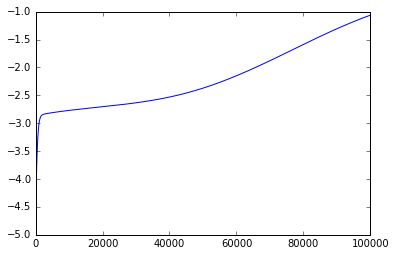

In [18]:
if __name__ == '__main__':
    test_xor()

#### Donut Problem

ll: -852.068282099  classification rate: 0.486
ll: -749.050325307  classification rate: 0.433
ll: -720.02355739  classification rate: 0.452
ll: -702.169982377  classification rate: 0.506
ll: -688.614659111  classification rate: 0.522
ll: -678.177872908  classification rate: 0.548
ll: -669.652556364  classification rate: 0.564
ll: -662.029838829  classification rate: 0.582
ll: -654.756585846  classification rate: 0.615
ll: -647.497823731  classification rate: 0.64
ll: -640.012203406  classification rate: 0.666
ll: -632.211063728  classification rate: 0.699
ll: -624.227107941  classification rate: 0.714
ll: -616.202006136  classification rate: 0.72
ll: -608.146591177  classification rate: 0.726
ll: -600.026561439  classification rate: 0.729
ll: -591.816049324  classification rate: 0.73
ll: -583.503957131  classification rate: 0.732
ll: -575.09064442  classification rate: 0.746
ll: -566.582983382  classification rate: 0.762
ll: -557.98863616  classification rate: 0.776
ll: -549.311431541 

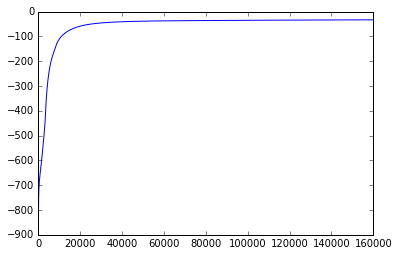

In [253]:
    #def test_donut():
    N = 1000
    # radiuses
    R_inner = 5
    R_outer = 10
    
    # dist from origin is radius + random normal
    # angle theta is uniformly distributed between (0, 2pi)
    # uniform distributions have mean 0.5
    R1 = np.random.randn(N/2) + R_inner
    theta = 2*np.pi*np.random.random(N/2)
    X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T
    
    R2 = np.random.randn(N/2) + R_outer
    theta = 2*np.pi*np.random.random(N/2)
    X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T
    
    X = np.concatenate([X_inner, X_outer])
    Y = np.array([0]*(N/2) + [1]*(N/2)).reshape((N,1))
        
    n_hidden = 8
    W1 = np.random.randn(2, n_hidden)
    b1 = np.random.randn(n_hidden)
    W2 = np.random.randn(n_hidden).reshape((n_hidden,1))
    b2 = np.random.randn(1)
    LL = [] # for keeping track of likelihood
    learning_rate = 0.00005
    regularization = 0.2
    last_error_rate = None
    for i in xrange(160000):
        pY, activation_Z = forward(X, W1, b1, W2, b2) # pY is activation of K
        ll = cost(Y, pY)
        prediction = predict(X, W1, b1, W2, b2)
        er = np.abs(prediction - Y).mean() # classification error
        LL.append(ll)
        
        #Update weights
        W2 += learning_rate * (derivative_w2(activation_Z, Y, pY) - regularization * W2)
        b2 += learning_rate * (derivative_b2(Y, pY) - regularization * b2)
        W1 += learning_rate * (derivative_w1(activation_Z, Y, pY, W2, X) - regularization * W1)
        b1 += learning_rate * (derivative_b1(activation_Z, Y, pY, W2) - regularization * b1)
        if i % 100==0:
            print 'll:',ll,' classification rate:', 1 - er
    print 'final classification rate:', 1 - np.abs(prediction - Y).mean()
    plt.plot(LL)
    plt.show()